In [1]:
import tensorflow as tf
import numpy as np

/home/abhijit/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.__version__

'1.10.0'

In [3]:
PATH = "/home/abhijit/Desktop/deep_learning_intro/Datasets/pima-indians-diabetes.data.csv"

In [4]:
dataset = np.loadtxt(PATH, delimiter=",")

In [5]:
dataset.shape

(768, 9)

In [6]:
X = dataset[:, 0:8]
Y = dataset[:,8]

In [7]:
X.shape

(768, 8)

In [8]:
Y.shape

(768,)

In [9]:
def model_builder(initializer, final_activation, input_size=8):
    """builds a tf.keras.Model
    
    Arguments:
        input_size (int): Input size for the network
        initializer (str/tf.keras.initializer): layer initializers
        final_activation (str/tf,keras/activations): final layer activation
    """
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(units=12, activation='relu', input_dim=input_size, kernel_initializer=initializer, name="first_hidden_layer"))
    model.add(tf.keras.layers.Dense(units=8, activation='relu', kernel_initializer=initializer, name="second_hidden_layer"))
    model.add(tf.keras.layers.Dense(units=1, activation=final_activation, kernel_initializer=initializer,name="predictions"))
    return model

In [10]:
model = model_builder(initializer="glorot_uniform", final_activation="sigmoid", input_size=8)

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
first_hidden_layer (Dense)   (None, 12)                108       
_________________________________________________________________
second_hidden_layer (Dense)  (None, 8)                 104       
_________________________________________________________________
predictions (Dense)          (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [12]:
tf.keras.utils.plot_model(model=model,show_layer_names=True,show_shapes=True,to_file="./first_model.png")

# Adam
# SGD with nesterov momentum

In [52]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [53]:
output = model.fit(X, Y,epochs=500,batch_size=32,validation_split=0.3)

Train on 537 samples, validate on 231 samples
Epoch 1/500
537/537 [==============================] - 0s 410us/step - loss: 0.6345 - acc: 0.6518 - val_loss: 0.6774 - val_acc: 0.6580
Epoch 2/500
537/537 [==============================] - 0s 23us/step - loss: 0.6339 - acc: 0.6518 - val_loss: 0.6785 - val_acc: 0.6580
Epoch 3/500
537/537 [==============================] - 0s 27us/step - loss: 0.6336 - acc: 0.6518 - val_loss: 0.6802 - val_acc: 0.6580
Epoch 4/500
537/537 [==============================] - 0s 35us/step - loss: 0.6332 - acc: 0.6518 - val_loss: 0.7023 - val_acc: 0.6580
Epoch 5/500
537/537 [==============================] - 0s 58us/step - loss: 0.6337 - acc: 0.6518 - val_loss: 0.6872 - val_acc: 0.6580
Epoch 6/500
537/537 [==============================] - 0s 37us/step - loss: 0.6330 - acc: 0.6518 - val_loss: 0.6853 - val_acc: 0.6580
Epoch 7/500
537/537 [==============================] - 0s 49us/step - loss: 0.6330 - acc: 0.6518 - val_loss: 0.6911 - val_acc: 0.6580
Epoch 8/500
537

In [54]:
import pandas as pd

In [55]:
history = pd.DataFrame(output.history)
%matplotlib inline

In [56]:
history.head()

,val_loss,val_acc,loss,acc
0,0.677430,0.658009,0.634489,0.651769
1,0.678459,0.658009,0.633867,0.651769
2,0.680156,0.658009,0.633607,0.651769
3,0.702283,0.658009,0.633210,0.651769
4,0.687194,0.658009,0.633654,0.651769


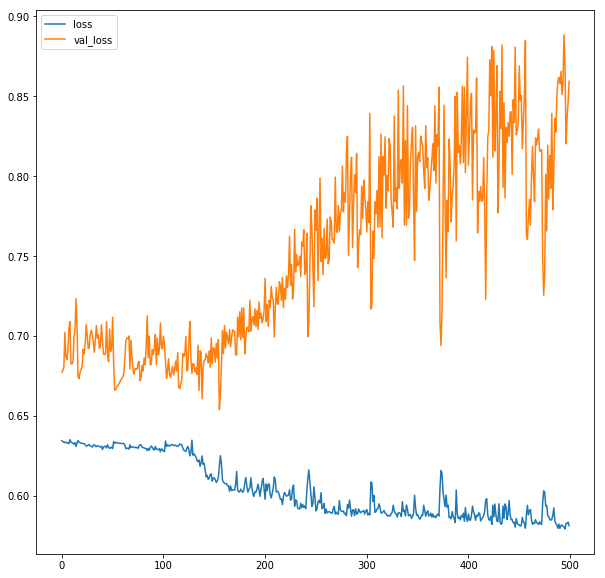

In [57]:
history.plot(y=["loss", "val_loss"],figsize=(10,10))

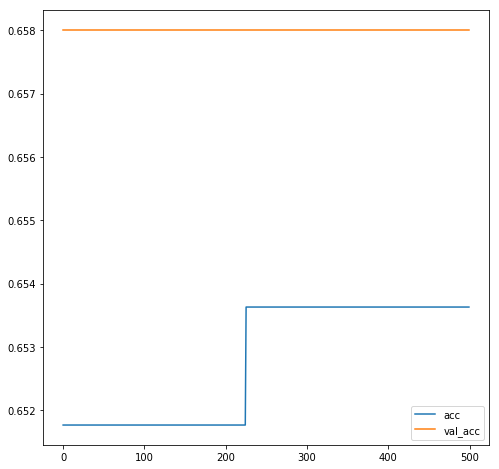

In [58]:
history.plot(y=["acc", "val_acc"],figsize=(8,8))

In [59]:
np.mean(history.val_acc)

0.6580086585247139